In [38]:
import pandas as pd
import math
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

### read the csv and total no. of children

In [2]:
scans = pd.read_csv('../../../../cgm-ml-service/dataset/msft/newmsft.csv')
print("Total no. of children:", len(scans))
scans.head()

Total no. of children: 1680


,qrcode,person_id,age,Years,key,height,weight,muac,month_age,gender,Z_score_WFH,Class_WFH,Z_score_WFA,Class_WFA,Z_score_HFA,Class_HFA,longitude,latitude,State
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,4,100.0,85.7,9.45,12.5,47,M,-2.83,MAM,-4.16,Severly Under-weight,-4.10,Severly Stunted,79.0,24.0,Madhya Pradesh
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,4,100.0,86.5,12.45,13.1,50,F,0.62,Healthy,-2.07,Moderately Under-weight,-3.97,Severly Stunted,NaN,NaN,NaN
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,3,100.0,71.6,8.10,13.5,31,F,-0.68,Healthy,-3.83,Severly Under-weight,-5.55,Severly Stunted,79.0,24.0,Madhya Pradesh
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,3,100.0,78.5,11.75,15.3,30,M,1.55,Healthy,-1.05,Healthy,-3.94,Severly Stunted,77.0,25.0,Madhya Pradesh
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,4,102.0,108.1,15.50,14.8,44,F,-1.55,Healthy,0.08,Healthy,1.88,Healthy,NaN,NaN,NaN


In [3]:
scans.describe()

,age,Years,key,height,weight,muac,month_age,Z_score_WFH,Z_score_WFA,Z_score_HFA,longitude,latitude
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1665.000000,1665.000000,1093.000000,1093.000000
mean,1398.369643,3.861905,100.172619,93.250536,12.274344,14.222143,46.128571,-1.268554,-2.050372,-2.030577,77.701738,24.489478
std,263.351921,0.752190,0.488059,7.067730,1.844005,0.996084,8.788570,0.970983,0.944995,1.218890,1.343403,0.500118
min,914.000000,3.000000,100.000000,58.300000,7.650000,11.500000,30.000000,-5.470000,-5.050000,-10.290000,76.000000,24.000000
25%,1166.000000,3.000000,100.000000,88.100000,11.000000,13.500000,38.000000,-1.890000,-2.700000,-2.780000,76.000000,24.000000
50%,1406.000000,4.000000,100.000000,93.000000,12.150000,14.200000,46.000000,-1.260000,-2.050000,-2.000000,77.000000,24.000000
75%,1621.250000,4.000000,100.000000,98.500000,13.500000,14.900000,54.000000,-0.670000,-1.420000,-1.300000,79.000000,25.000000
max,2094.000000,6.000000,102.000000,114.700000,19.000000,18.200000,69.000000,8.100000,1.350000,3.190000,80.000000,25.000000


### getting the total of gender

F    845
M    835
Name: gender, dtype: int64


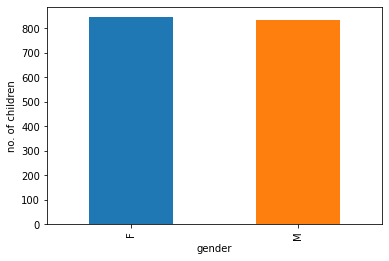

In [6]:
ax = scans['gender'].value_counts().plot(kind='bar')
ax.set_xlabel('gender')
ax.set_ylabel('no. of children')
print(scans['gender'].value_counts())

In [7]:
## function to convert the days into age
def age(row):
    in_years= row['age']/365
    return round(in_years)

In [8]:
#adding the Years column into dataframe
scans['Years'] = scans.apply(age,axis=1)
scans.head()

,qrcode,person_id,age,Years,key,height,weight,muac,month_age,gender,Z_score_WFH,Class_WFH,Z_score_WFA,Class_WFA,Z_score_HFA,Class_HFA,longitude,latitude,State
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,4,100.0,85.7,9.45,12.5,47,M,-2.83,MAM,-4.16,Severly Under-weight,-4.10,Severly Stunted,79.0,24.0,Madhya Pradesh
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,4,100.0,86.5,12.45,13.1,50,F,0.62,Healthy,-2.07,Moderately Under-weight,-3.97,Severly Stunted,NaN,NaN,NaN
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,3,100.0,71.6,8.10,13.5,31,F,-0.68,Healthy,-3.83,Severly Under-weight,-5.55,Severly Stunted,79.0,24.0,Madhya Pradesh
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,3,100.0,78.5,11.75,15.3,30,M,1.55,Healthy,-1.05,Healthy,-3.94,Severly Stunted,77.0,25.0,Madhya Pradesh
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,4,102.0,108.1,15.50,14.8,44,F,-1.55,Healthy,0.08,Healthy,1.88,Healthy,NaN,NaN,NaN


In [12]:
print("Total no. of age greater than 60 months: " ,len(scans[scans['month_age'] >60]))

Total no. of age greater than 60 months:  15


### plotting the bar graph no. of children against age

4    704
3    605
5    369
6      2
Name: Years, dtype: int64


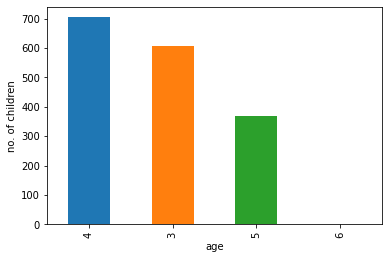

In [9]:
age_ax = scans['Years'].value_counts().plot(kind='bar')
age_ax.set_xlabel('age')
age_ax.set_ylabel('no. of children')
print(scans['Years'].value_counts())

### getting the distribition based on gender

In [14]:
male = scans[scans['gender']=='M']
print('No. of male distribution: ')
print(male['Years'].value_counts())

No. of male distribution: 
4    364
3    282
5    189
Name: Years, dtype: int64


In [16]:
female = scans[scans['gender']=='F']
print('No. of female distribution: ')
print(female['Years'].value_counts())

No. of female distribution: 
4    340
3    323
5    180
6      2
Name: Years, dtype: int64


### Reading the csv files and get the data at artifacts level

In [17]:
artifacts = pd.read_csv('artifacts.csv')
artifacts.head()

,artifacts,storage_path,qrcode,key,height,weight,muac,zscore_height,zscore_weight,zscore_muac
0,pc_1584997475-0195z663pl_1591588126306_100_000...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
1,pc_1584997475-0195z663pl_1591588126306_100_001...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
2,pc_1584997475-0195z663pl_1591588126306_100_002...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
3,pc_1584997475-0195z663pl_1591588126306_100_003...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
4,pc_1584997475-0195z663pl_1591588126306_100_004...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008


In [18]:
## dropping the null values from the artifacts 
artifacts  = artifacts.dropna()

In [19]:
artifacts.describe()

,key,height,weight,muac,zscore_height,zscore_weight,zscore_muac
count,42298.000000,42298.000000,42298.000000,42298.000000,42298.000000,42298.000000,42298.000000
mean,100.996548,93.752121,12.381007,14.250253,1.238570,1.833350,2.259290
std,0.752257,7.029523,1.838878,1.020104,0.994711,0.997211,1.024201
min,100.000000,58.300000,7.650000,11.500000,-3.777749,-0.732104,-0.502008
25%,100.000000,88.700000,11.100000,13.600000,0.523508,1.138829,1.606426
50%,101.000000,93.600000,12.350000,14.200000,1.216803,1.816703,2.208835
75%,102.000000,98.700000,13.550000,14.900000,1.938396,2.467462,2.911647
max,102.000000,114.700000,19.000000,18.200000,4.202216,5.422993,6.224900


In [20]:
print("Total no. of pointclouds:",len(artifacts ))

Total no. of pointclouds: 42298


101.0    18362
100.0    12041
102.0    11895
Name: key, dtype: int64


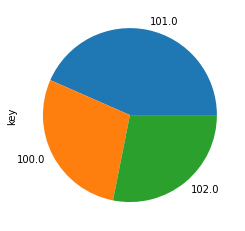

In [21]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
print(artifacts['key'].value_counts())
artifacts['key'].value_counts().plot(kind='pie')

### plotting the height and weight distribution

In [22]:
## fucntion to extract just the qrcode from them path, not re4quired anymore added this field already to csv file
def extractqrcode(row):
    complete_path = row['storage_path']
    path = complete_path.split('/')
    qrcode = path[1]
    return qrcode

In [23]:
#applying ectractqrcode to artifacts frame , no need to run this cel as well
artifacts['qrcode'] = artifacts.apply(extractqrcode,axis=1)
artifacts.head()

,artifacts,storage_path,qrcode,key,height,weight,muac,zscore_height,zscore_weight,zscore_muac
0,pc_1584997475-0195z663pl_1591588126306_100_000...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
1,pc_1584997475-0195z663pl_1591588126306_100_001...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
2,pc_1584997475-0195z663pl_1591588126306_100_002...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
3,pc_1584997475-0195z663pl_1591588126306_100_003...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
4,pc_1584997475-0195z663pl_1591588126306_100_004...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008


In [26]:
getheight = artifacts.drop_duplicates(subset=['qrcode']).reset_index(drop=True)
getheight.head()

,artifacts,storage_path,qrcode,key,height,weight,muac,zscore_height,zscore_weight,zscore_muac
0,pc_1584997475-0195z663pl_1591588126306_100_000...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
1,pc_1584999865-01t0n240ra_1591629837700_100_008...,qrcode/1584999865-01t0n240ra/measure/159162983...,1584999865-01t0n240ra,100.0,86.5,12.45,13.1,0.212233,1.870933,1.104418
2,pc_1583942091-02migjdla1_1591470015961_100_000...,qrcode/1583942091-02migjdla1/measure/159147001...,1583942091-02migjdla1,100.0,71.6,8.10,13.5,-1.895949,-0.488069,1.506024
3,pc_1585011777-031jov4jpw_1591815240163_100_000...,qrcode/1585011777-031jov4jpw/measure/159181524...,1585011777-031jov4jpw,100.0,78.5,11.75,15.3,-0.919677,1.491323,3.313253
4,pc_1585003039-032hniw434_1591707933084_102_000...,qrcode/1585003039-032hniw434/measure/159170793...,1585003039-032hniw434,102.0,108.1,15.50,14.8,3.268390,3.524946,2.811245


In [19]:
print("Total no.unique scans:", len(getheight))

Total no.unique scans: 1680


Text(0, 0.5, 'height')

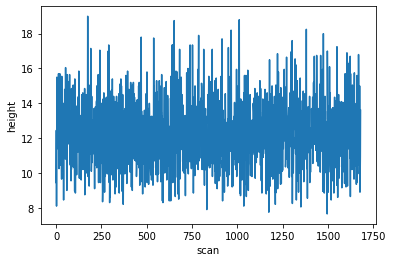

In [27]:
heightax = getheight['weight'].plot()
heightax.set_xlabel('scan')
heightax.set_ylabel('height')

Text(0.5, 0, 'weight')

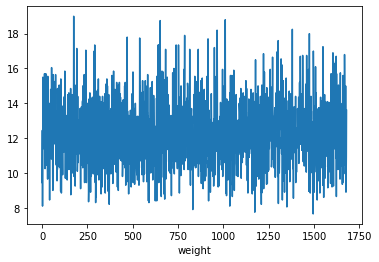

In [28]:
weightax = getheight['weight'].plot()
weightax.set_xlabel('scan')
weightax.set_xlabel('weight')

In [29]:
distribution_data = pd.merge(scans,getheight[['height','weight','muac','qrcode']],on='qrcode', how='left')
distribution_data.head()

,qrcode,person_id,age,Years,key,height_x,weight_x,muac_x,month_age,gender,...,Z_score_WFA,Class_WFA,Z_score_HFA,Class_HFA,longitude,latitude,State,height_y,weight_y,muac_y
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,4,100.0,85.7,9.45,12.5,47,M,...,-4.16,Severly Under-weight,-4.10,Severly Stunted,79.0,24.0,Madhya Pradesh,85.7,9.45,12.5
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,4,100.0,86.5,12.45,13.1,50,F,...,-2.07,Moderately Under-weight,-3.97,Severly Stunted,NaN,NaN,NaN,86.5,12.45,13.1
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,3,100.0,71.6,8.10,13.5,31,F,...,-3.83,Severly Under-weight,-5.55,Severly Stunted,79.0,24.0,Madhya Pradesh,71.6,8.10,13.5
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,3,100.0,78.5,11.75,15.3,30,M,...,-1.05,Healthy,-3.94,Severly Stunted,77.0,25.0,Madhya Pradesh,78.5,11.75,15.3
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,4,102.0,108.1,15.50,14.8,44,F,...,0.08,Healthy,1.88,Healthy,NaN,NaN,NaN,108.1,15.50,14.8


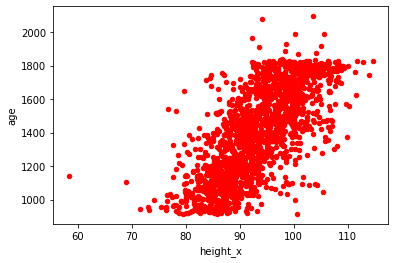

In [31]:
#distribution of height against age
heightvsage = distribution_data.plot.scatter(x='height_x',
                      y='age',
                      c='red')

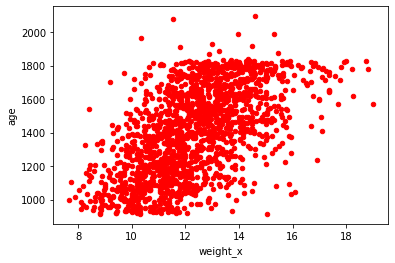

In [34]:
#distribution of weight against age
weightvsage = distribution_data.plot.scatter(x='weight_x',
                      y='age',
                      c='red')

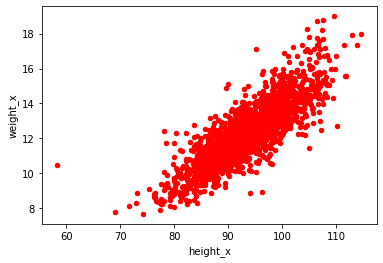

In [36]:
## distribution of height against weight
weightvsheight = distribution_data.plot.scatter(x='height_x',
                      y='weight_x',
                      c='red')

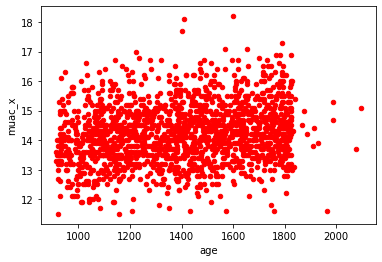

In [37]:
## distribution of age against weight
weightvsheight = distribution_data.plot.scatter(x='age',
                      y='muac_x',
                      c='red')

## Plotting the location from where data was collected

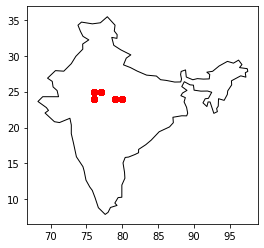

In [43]:
geometry = [Point(xy) for xy in zip(scans['longitude'], scans['latitude'])]
gdf = GeoDataFrame(scans, geometry=geometry) 
world =  gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to India.
ax = world[world.name == 'India'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

In [44]:
scans['State'].value_counts() ## Amount of scans for different location

Madhya Pradesh    810
Rajasthan         283
Name: State, dtype: int64

In [45]:
scans['State'].isna().sum() ## Amount of scans where the location info for scans is not available

587

Healthy                    788
Moderately Under-weight    623
Severly Under-weight       254
Name: Class_WFA, dtype: int64
Scans with null values: 15


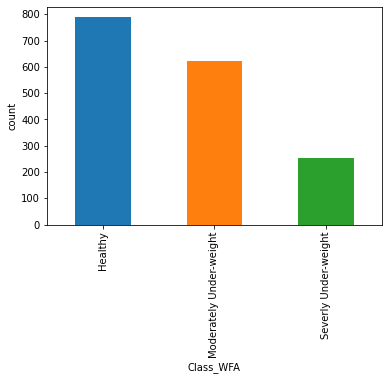

In [48]:
Class_WFA_ax = scans['Class_WFA'].value_counts().plot(kind='bar')
Class_WFA_ax.set_xlabel('Class_WFA')
Class_WFA_ax.set_ylabel('count')
print(scans['Class_WFA'].value_counts())
print('Scans with null values:',scans['Class_WFA'].isna().sum())

Healthy               837
Moderately Stunted    488
Severly Stunted       340
Name: Class_HFA, dtype: int64
Scans with null values: 15


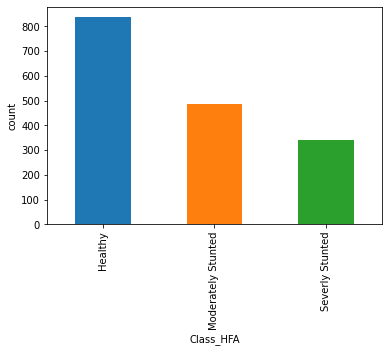

In [49]:
Class_HFA_ax = scans['Class_HFA'].value_counts().plot(kind='bar')
Class_HFA_ax.set_xlabel('Class_HFA')
Class_HFA_ax.set_ylabel('count')
print(scans['Class_HFA'].value_counts())
print('Scans with null values:',scans['Class_HFA'].isna().sum())

Healthy    1324
MAM         303
SAM          53
Name: Class_WFH, dtype: int64
Scans with null values: 0


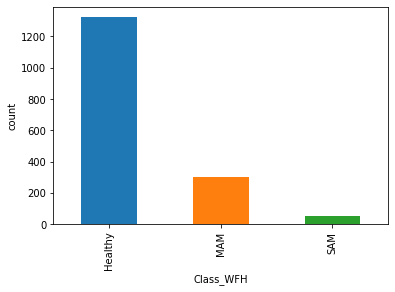

In [51]:
Class_WFH_ax = scans['Class_WFH'].value_counts().plot(kind='bar') ## WFH SAM
Class_WFH_ax.set_xlabel('Class_WFH')
Class_WFH_ax.set_ylabel('count')
print(scans['Class_WFH'].value_counts())
print('Scans with null values:',scans['Class_WFH'].isna().sum())

## Check on the amount of artifacts and scans from the dataset

In [27]:
from azureml.core import Workspace, Dataset
ws = Workspace.from_config()
dataset = Dataset.get_by_name(ws, name='anon-pcd-opensource')
type(dataset)

azureml.data.file_dataset.FileDataset

In [28]:
mount_context = dataset.mount()
mount_context.start()  # this will mount the file streams
print(mount_context.mount_point)

/tmp/tmp6ss7mphd


In [30]:
import glob2
dataset = glob2.glob('/tmp/tmp6ss7mphd/qrcode/**/*.pcd')
len(dataset)

42298

In [31]:
print("Total no. of pointclouds in csv:",len(artifacts))
print("Total no. of pointclouds in dataset:",len(dataset))

Total no. of pointclouds in csv: 42298
Total no. of pointclouds in dataset: 42298


In [32]:
## extracting the qrcodes
qrcodes_data = []
for path in dataset:
    data =path.split('/')
    qrcodes_data.append(data[4])
qrc_dataframe = pd.DataFrame(qrcodes_data,columns=['qrcodes'])

In [33]:
print("Total no. of scans in dataset:",len(qrc_dataframe['qrcodes'].unique()))
print("Total no. of scans in csv:", len(scans))      

Total no. of scans in dataset: 1680
Total no. of scans in csv: 1680
